# <span style="color:blue">Programação Python para Ciência de Dados</span>

## <span style="color:blue">Prática 5: Clustering</span>

Carrege na célula abaixo os módulos Python que julgar necessário para realizar os exercícios:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


#### 1. Carregue a base de dados do ENEM que foi trabalhada na última aula (ENEM2015.csv)

In [2]:
df = pd.read_csv('ENEM2015.csv')
df.head()

,CODIGO DA ENTIDADE,NUMERO DE PARTICIPANTES,Classificacao
0,35000139,142,1
1,35000140,79,1
2,35000267,131,2
3,35000280,146,1
4,35000334,95,1


#### 2. Realize uma análise exploratória simples da base (estatística da base)

In [3]:
df.describe()

,CODIGO DA ENTIDADE,NUMERO DE PARTICIPANTES,Classificacao
count,1.243000e+03,1243.000000,1243.000000
mean,3.519615e+07,60.721641,2.034594
std,2.416603e+05,62.141025,0.667579
min,3.500014e+07,10.000000,0.000000
25%,3.504938e+07,21.000000,2.000000
50%,3.512573e+07,40.000000,2.000000
75%,3.516714e+07,76.000000,2.000000
max,3.599001e+07,574.000000,4.000000


(array([  2.,   0., 193.,   0.,   0., 865.,   0., 126.,   0.,  57.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

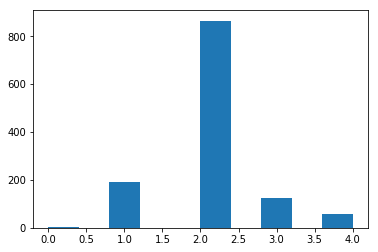

In [4]:
plt.hist(df['Classificacao'])

In [5]:
import seaborn as sns

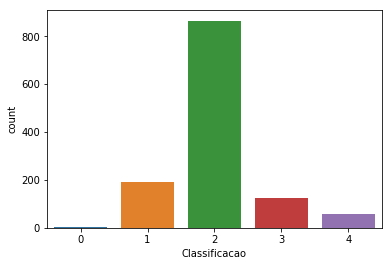

In [6]:
sns.countplot(df['Classificacao'])

#### 3. Execute o algorimo k-Means com k=5 na base e exibida uma instância (um elemento) de cada cluster gerado

In [ ]:
StandardScaler

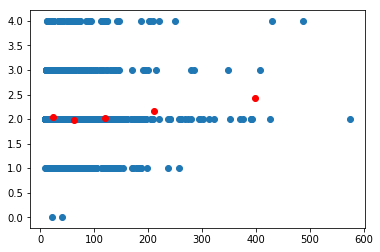

In [15]:
from sklearn.cluster import KMeans
x = df.iloc[:, 1:]

model = KMeans(n_clusters=5)
model.fit(x)

centers = model.cluster_centers_
plt.scatter(x.iloc[:,0], x.iloc[:,1])
plt.scatter(centers[:,0], centers[:,1], c='r')


#### 4. Execute o algoritmo k-Means na base, variando o parametro *n_centroids*. Faça um plot do número de clusters pela inércia.

A inércia é uma medida da qualidade do agrupamento, defina como $\sum_{i=0}^{n}(||x_i - \mu_j||^2) $, para cada centroide $\mu_j$

**DICA**: Perceba que a classe K-Means já possui um atributo inércia depois de treinado (consultar documentação do scikit-learn para ver como acessar).

In [17]:
clusters = [t for t in range(1,8)]
results = []

for clus in clusters:
    model = KMeans(n_clusters=clus)
    model.fit(x)
    results.append(model.inertia_)

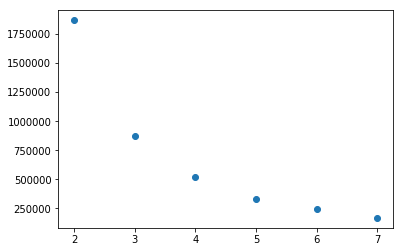

In [19]:
plt.scatter(clusters[1:], results[1:])

#### 5. Crie uma nova versão da base de dados realizando a normalização dos valores dos atributos. 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
normalized = scaler.transform(x)
normalized = pd.DataFrame(normalized, columns=x.columns)

normalized.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,NUMERO DE PARTICIPANTES,Classificacao
0,1.308493,-1.550393
1,0.294262,-1.550393
2,1.131405,-0.051841
3,1.372888,-1.550393
4,0.551844,-1.550393


#### 6. Verifique se a normalização afeta o resultado do k-Means?

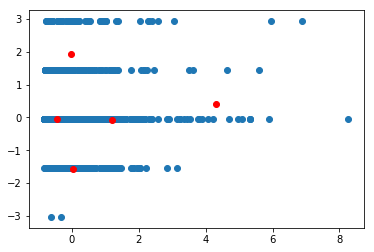

In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(normalized)

centers = model.cluster_centers_
plt.scatter(normalized.iloc[:,0], normalized.iloc[:,1])
plt.scatter(centers[:,0], centers[:,1], c='r')


#### 7. Execute mais uma vez o k-Means variando o número de centroides e faça o mesmo gráfico que solicitado no exercício 4.


---


## <span style="color:blue">Prática 5: Web Scraping</span>

#### 8. Acesse o link https://xkcd.com/353/info.0.json via python ``request``, a qual retornará um arquivo tipo JSON sobre um comic. Armazene o resultado como um dicionário. Qual o "title" armazenado no JSON?

**DICA**: A biblioteca requests já possui um método JSON

In [29]:
import requests

link = 'https://xkcd.com/353/info.0.json'
page = requests.get(link)
dic = page.json()
type(dic)

dic['title']

dict

#### 9. Ainda sobre o JSON acima, pegue o link para a imagem armazenada e utilize a biblioteca IPython.display para mostrar a imagem.


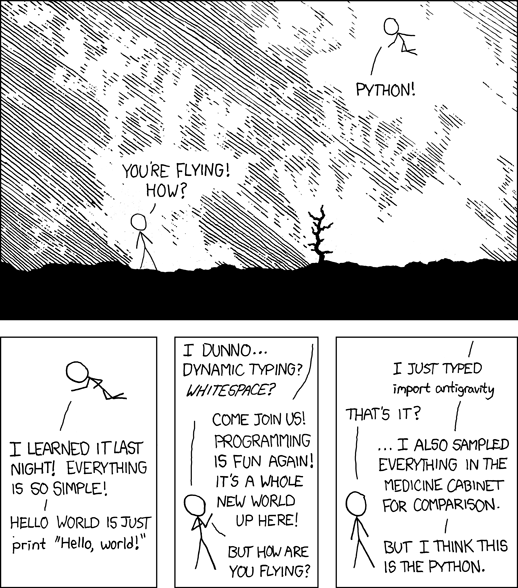

In [31]:
from IPython.display import Image
Image(dic['img'])


---

## <span style="color:blue">Prática 5: Aprendizado de Máquina</span>

#### 10. Carregue o dataset "digits" do Sklearn e divida ele em 70% para treino e 30% para teste. 


In [ ]:
# return_X_y=True
# load_digits

In [0]:
# Utilize esse código para visualizar as imagens depois de armazenadas num vetor x
"""
import matplotlib.pyplot as plt 
%matplotlib inline
plt.gray() 
plt.matshow(x[0].reshape(8, 8)) 
"""

'\nimport matplotlib.pyplot as plt \n%matplotlib inline\nplt.gray() \nplt.matshow(x[0].reshape(8, 8)) \n'

In [32]:
from sklearn.datasets import load_digits
x, y = load_digits(return_X_y=True)

<Figure size 432x288 with 0 Axes>

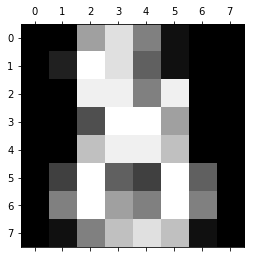

In [36]:
#%matplotlib inline
plt.gray() 
plt.matshow(x[-1].reshape(8, 8)) 

In [35]:
y[0]

0

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.3)

#### 11. Treine um DecisionTreeClassifier para classificar os dígitos. Quantos % de acurácia conseguimos?

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
preds = model.predict(x_test)

accuracy_score(y_test, preds)


0.8407407407407408

#### 12. Repita o experimento acima, mas teste o modelo com diferentes parâmetros de "max_depth" (altura máxima da árvore), variando ele de 3 a 7 e variando o parâmetro "criterion" (o critério utilizado para fazer um corte) entre "gini" e "entropy". Qual o melhor resultado?

#### 13. Salve o modelo em um arquivo "model.joblib", depois carregue ele e de novo e use ele para ver a acurácia sobre o conjunto de teste.

**DICA**: Pesquise a biblioteca *joblib* para salvar o modelo

In [43]:
!python3 -m pip install joblib

    100% |████████████████████████████████| 296kB 4.2MB/s ta 0:00:01


In [44]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']

In [45]:
model2 = joblib.load('model.joblib')

In [46]:
preds = model2.predict(x_test)

accuracy_score(y_test, preds)

0.8407407407407408